## Contents 
1. [Import the necessary libraries](#1.-Import-the-necessary-libraries)
2. [Data cleaning](#2.-Data-cleaning)
3. [Data visualisation](#3.-Data-visualisation)
4. [Pandas profiling](#4.-Pandas-profiling)

### 1. Import the necessary libraries

In [1]:
# do not show warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install pandas_profiling

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from datetime import datetime
from pandas_profiling import ProfileReport

### 2. Data cleaning 

This chapter contains the following:
- Missing value handling
- Inconsistent data handling
- Rename columns and values and drop unnecessary columns
- Duplicate data handling
- Outlier handling

In [4]:
file = pd.read_csv('InternalCallL.csv')

In [5]:
df=pd.DataFrame(file)
df

,Unnamed: 0,Nr.,Unnamed: 1,Day,Date,Duration,Extension1,Ext.1 Name,Ext.1 Dep.,Extension2,Ext.2 Name,Ext.2 Dep.,Type,Unnamed: 12,Status,Ring Time
0,0,1,NaN,Tue,3/14/2023 18:30:20,00:00:00,412,NaN,NaN,755,NaN,NaN,Inc.,NaN,Unansw.,0 sec.
1,1,2,NaN,Tue,3/14/2023 18:30:20,00:00:00,755,NaN,NaN,412,NaN,NaN,Out,NaN,Unansw.,0 sec.
2,2,3,NaN,Tue,3/14/2023 16:56:44,00:01:19,122,Mohammed,CyberSecurity Department,430,Mohammed,Information Technology,Inc.,NaN,Answ.,5 sec.
3,3,4,NaN,Tue,3/14/2023 16:56:44,00:01:19,430,Mohammed,Information Technology,122,Mohammed,CyberSecurity Department,Out,NaN,Answ.,5 sec.
4,4,5,NaN,Tue,3/14/2023 16:50:37,00:00:00,310,faiqah,Electro-Optics Systems Lab,105,syed,Strategic Planning / VRO,Inc.,NaN,Unansw.,20 sec.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,NaN,Sun,2/26/2023 11:21:02,00:00:00,118,Fahad,Documents and Archiving Center,400,Ibrahim,FSS Management,Out,NaN,Unansw.,30 sec.
9996,9996,9997,NaN,Sun,2/26/2023 11:20:51,00:00:31,428,Sulaytin,Information Technology,415,meshari,Information Technology,Inc.,NaN,Answ.,4 sec.
9997,9997,9998,NaN,Sun,2/26/2023 11:20:51,00:00:31,415,meshari,Information Technology,428,Sulaytin,Information Technology,Out,NaN,Answ.,4 sec.
9998,9998,9999,NaN,Sun,2/26/2023 11:17:47,00:01:10,407,abdulaziz,Facilities Management Department,408,Musaad,Financial Accounting,Inc.,NaN,Answ.,16 sec.


In [6]:
df.shape

(10000, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Nr.          10000 non-null  int64  
 2   Unnamed: 1   0 non-null      float64
 3   Day          10000 non-null  object 
 4   Date         10000 non-null  object 
 5   Duration     10000 non-null  object 
 6   Extension1   10000 non-null  int64  
 7   Ext.1 Name   9275 non-null   object 
 8   Ext.1 Dep.   9250 non-null   object 
 9   Extension2   10000 non-null  int64  
 10  Ext.2 Name   9275 non-null   object 
 11  Ext.2 Dep.   9250 non-null   object 
 12  Type         10000 non-null  object 
 13  Unnamed: 12  0 non-null      float64
 14  Status       10000 non-null  object 
 15  Ring Time    10000 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 1.2+ MB


In [8]:
df.describe()

,Unnamed: 0,Nr.,Unnamed: 1,Extension1,Extension2,Unnamed: 12
count,10000.00000,10000.00000,0.0,10000.00000,10000.00000,0.0
mean,4999.50000,5000.50000,NaN,349.12010,349.12010,NaN
std,2886.89568,2886.89568,NaN,260.46436,260.46436,NaN
min,0.00000,1.00000,NaN,102.00000,102.00000,NaN
25%,2499.75000,2500.75000,NaN,218.00000,218.00000,NaN
50%,4999.50000,5000.50000,NaN,411.00000,411.00000,NaN
75%,7499.25000,7500.25000,NaN,424.00000,424.00000,NaN
max,9999.00000,10000.00000,NaN,7600.00000,7600.00000,NaN


#### 1. Rename columns and values and drop unnecessary columns

In [9]:
df.rename(columns = {"Ext.1 Name":"Extension1_Name","Ext.2 Name":"Extension2_Name",
                     "Ext.1 Dep.":"Extension1_Department","Ext.2 Dep.":"Extension2_Department",
                     "Ring Time":"Ring_time_per_second"},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10000 non-null  int64  
 1   Nr.                    10000 non-null  int64  
 2   Unnamed: 1             0 non-null      float64
 3   Day                    10000 non-null  object 
 4   Date                   10000 non-null  object 
 5   Duration               10000 non-null  object 
 6   Extension1             10000 non-null  int64  
 7   Extension1_Name        9275 non-null   object 
 8   Extension1_Department  9250 non-null   object 
 9   Extension2             10000 non-null  int64  
 10  Extension2_Name        9275 non-null   object 
 11  Extension2_Department  9250 non-null   object 
 12  Type                   10000 non-null  object 
 13  Unnamed: 12            0 non-null      float64
 14  Status                 10000 non-null  object 
 15  Rin

In [11]:
df["Type"]=df["Type"].map({"Inc." : "Income" , "Out" : "Outcome"})
df["Type"].value_counts()

Income     5000
Outcome    5000
Name: Type, dtype: int64

In [12]:
df["Status"]=df["Status"].map({"Answ." : "Answer" , "Unansw." : "Unnswer"})
df["Status"].value_counts()

Answer     5456
Unnswer    4544
Name: Status, dtype: int64

In [13]:
df["Extension1_Name"].value_counts()

Abdulelah      673
Abdullah       399
mohammed       344
muhrah         324
meshal         314
              ... 
Sara             2
Saleh            1
suliman          1
Muntasir         1
Abdulfattah      1
Name: Extension1_Name, Length: 104, dtype: int64

In [14]:
df["Extension2_Name"].value_counts()

Abdulelah      673
Abdullah       399
mohammed       344
muhrah         324
meshal         314
              ... 
Sara             2
Saleh            1
suliman          1
Muntasir         1
Abdulfattah      1
Name: Extension2_Name, Length: 104, dtype: int64

In [15]:
#drop unusefull columns
df = df.drop(['Extension1' ,'Extension2','Unnamed: 1','Unnamed: 12','Unnamed: 0','Nr.'], axis=1)
df.head()

,Day,Date,Duration,Extension1_Name,Extension1_Department,Extension2_Name,Extension2_Department,Type,Status,Ring_time_per_second
0,Tue,3/14/2023 18:30:20,00:00:00,NaN,NaN,NaN,NaN,Income,Unnswer,0 sec.
1,Tue,3/14/2023 18:30:20,00:00:00,NaN,NaN,NaN,NaN,Outcome,Unnswer,0 sec.
2,Tue,3/14/2023 16:56:44,00:01:19,Mohammed,CyberSecurity Department,Mohammed,Information Technology,Income,Answer,5 sec.
3,Tue,3/14/2023 16:56:44,00:01:19,Mohammed,Information Technology,Mohammed,CyberSecurity Department,Outcome,Answer,5 sec.
4,Tue,3/14/2023 16:50:37,00:00:00,faiqah,Electro-Optics Systems Lab,syed,Strategic Planning / VRO,Income,Unnswer,20 sec.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Day                    10000 non-null  object
 1   Date                   10000 non-null  object
 2   Duration               10000 non-null  object
 3   Extension1_Name        9275 non-null   object
 4   Extension1_Department  9250 non-null   object
 5   Extension2_Name        9275 non-null   object
 6   Extension2_Department  9250 non-null   object
 7   Type                   10000 non-null  object
 8   Status                 10000 non-null  object
 9   Ring_time_per_second   10000 non-null  object
dtypes: object(10)
memory usage: 781.4+ KB


#### 2. Missing value handling

In [17]:
# check for null values 
df.isnull().sum()

Day                        0
Date                       0
Duration                   0
Extension1_Name          725
Extension1_Department    750
Extension2_Name          725
Extension2_Department    750
Type                       0
Status                     0
Ring_time_per_second       0
dtype: int64

In [18]:
df[df['Extension1_Department'].isnull()].head(5)# the nulls for test or before assign an user

,Day,Date,Duration,Extension1_Name,Extension1_Department,Extension2_Name,Extension2_Department,Type,Status,Ring_time_per_second
0,Tue,3/14/2023 18:30:20,00:00:00,NaN,NaN,NaN,NaN,Income,Unnswer,0 sec.
1,Tue,3/14/2023 18:30:20,00:00:00,NaN,NaN,NaN,NaN,Outcome,Unnswer,0 sec.
80,Tue,3/14/2023 15:28:33,00:00:24,NaN,NaN,Ibrahim,FSS Management,Income,Answer,5 sec.
118,Tue,3/14/2023 15:02:36,00:00:00,NaN,NaN,Abdulelah,General Directorate Office,Income,Unnswer,6 sec.
130,Tue,3/14/2023 14:57:08,00:00:12,NaN,NaN,NaN,NaN,Income,Answer,7 sec.


In [19]:
# Drop missing values,which is for testing
df=df.dropna(axis=0,subset=['Extension2_Name','Extension1_Name','Extension1_Department','Extension2_Department'],how='any')
df.head()

,Day,Date,Duration,Extension1_Name,Extension1_Department,Extension2_Name,Extension2_Department,Type,Status,Ring_time_per_second
2,Tue,3/14/2023 16:56:44,00:01:19,Mohammed,CyberSecurity Department,Mohammed,Information Technology,Income,Answer,5 sec.
3,Tue,3/14/2023 16:56:44,00:01:19,Mohammed,Information Technology,Mohammed,CyberSecurity Department,Outcome,Answer,5 sec.
4,Tue,3/14/2023 16:50:37,00:00:00,faiqah,Electro-Optics Systems Lab,syed,Strategic Planning / VRO,Income,Unnswer,20 sec.
5,Tue,3/14/2023 16:50:37,00:00:00,syed,Strategic Planning / VRO,faiqah,Electro-Optics Systems Lab,Outcome,Unnswer,20 sec.
6,Tue,3/14/2023 16:35:52,00:00:00,mohammed,"Legal Affairs, Partnerships & International Co...",mohammed,Business Development and Corporate Communication,Income,Unnswer,43 sec.


In [20]:
df.isnull().sum()

Day                      0
Date                     0
Duration                 0
Extension1_Name          0
Extension1_Department    0
Extension2_Name          0
Extension2_Department    0
Type                     0
Status                   0
Ring_time_per_second     0
dtype: int64

#### 3. Inconsistent data handling

In [21]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [22]:
df["Date"].info()

<class 'pandas.core.series.Series'>
Int64Index: 8734 entries, 2 to 9999
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8734 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 136.5 KB


In [23]:
df.head(1)

,Day,Date,Duration,Extension1_Name,Extension1_Department,Extension2_Name,Extension2_Department,Type,Status,Ring_time_per_second
2,Tue,2023-03-14 16:56:44,00:01:19,Mohammed,CyberSecurity Department,Mohammed,Information Technology,Income,Answer,5 sec.


In [24]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [25]:
df.head(5)

,Day,Date,Duration,Extension1_Name,Extension1_Department,Extension2_Name,Extension2_Department,Type,Status,Ring_time_per_second
2,Tue,2023-03-14 16:56:44,0 days 00:01:19,Mohammed,CyberSecurity Department,Mohammed,Information Technology,Income,Answer,5 sec.
3,Tue,2023-03-14 16:56:44,0 days 00:01:19,Mohammed,Information Technology,Mohammed,CyberSecurity Department,Outcome,Answer,5 sec.
4,Tue,2023-03-14 16:50:37,0 days 00:00:00,faiqah,Electro-Optics Systems Lab,syed,Strategic Planning / VRO,Income,Unnswer,20 sec.
5,Tue,2023-03-14 16:50:37,0 days 00:00:00,syed,Strategic Planning / VRO,faiqah,Electro-Optics Systems Lab,Outcome,Unnswer,20 sec.
6,Tue,2023-03-14 16:35:52,0 days 00:00:00,mohammed,"Legal Affairs, Partnerships & International Co...",mohammed,Business Development and Corporate Communication,Income,Unnswer,43 sec.


In [26]:
df["Duration"].info()

<class 'pandas.core.series.Series'>
Int64Index: 8734 entries, 2 to 9999
Series name: Duration
Non-Null Count  Dtype          
--------------  -----          
8734 non-null   timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 136.5 KB


In [27]:
df['Ring_time_per_second'] = df['Ring_time_per_second'].str.replace("sec.", "")

In [28]:
df['Ring_time_per_second'].value_counts()

3       1020
4        920
5        554
6        514
2        400
        ... 
628        2
76         2
621        2
790        2
647        2
Name: Ring_time_per_second, Length: 170, dtype: int64

In [29]:
df['Ring_time_per_second'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8734 entries, 2 to 9999
Series name: Ring_time_per_second
Non-Null Count  Dtype 
--------------  ----- 
8734 non-null   object
dtypes: object(1)
memory usage: 136.5+ KB


In [30]:
df['Ring_time_per_second'] = pd.to_numeric(df['Ring_time_per_second'])

In [31]:
df['Ring_time_per_second'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8734 entries, 2 to 9999
Series name: Ring_time_per_second
Non-Null Count  Dtype
--------------  -----
8734 non-null   int64
dtypes: int64(1)
memory usage: 136.5 KB


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8734 entries, 2 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Day                    8734 non-null   object         
 1   Date                   8734 non-null   datetime64[ns] 
 2   Duration               8734 non-null   timedelta64[ns]
 3   Extension1_Name        8734 non-null   object         
 4   Extension1_Department  8734 non-null   object         
 5   Extension2_Name        8734 non-null   object         
 6   Extension2_Department  8734 non-null   object         
 7   Type                   8734 non-null   object         
 8   Status                 8734 non-null   object         
 9   Ring_time_per_second   8734 non-null   int64          
dtypes: datetime64[ns](1), int64(1), object(7), timedelta64[ns](1)
memory usage: 750.6+ KB


#### 3. Outlier handling

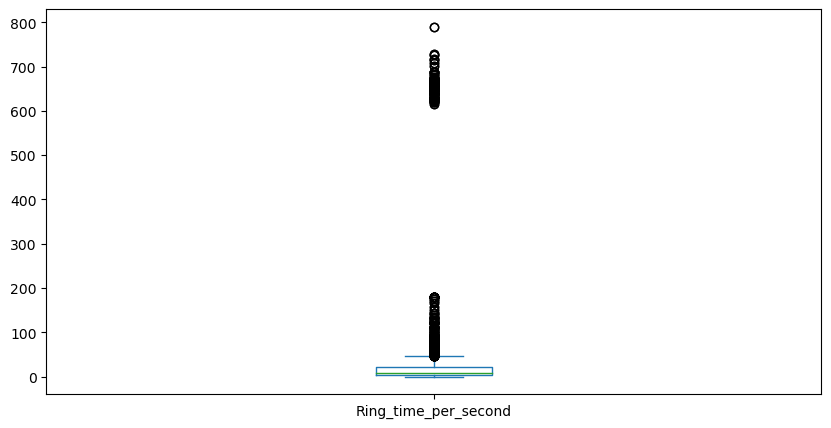

In [33]:
#show the outlier
df.plot(kind ='box', subplots=True,figsize=(10,5));


In [34]:
Q1 = df.Ring_time_per_second.quantile(0.25)
Q3 = df.Ring_time_per_second.quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
df.loc[df["Ring_time_per_second"] > upper,"Ring_time_per_second"] = upper

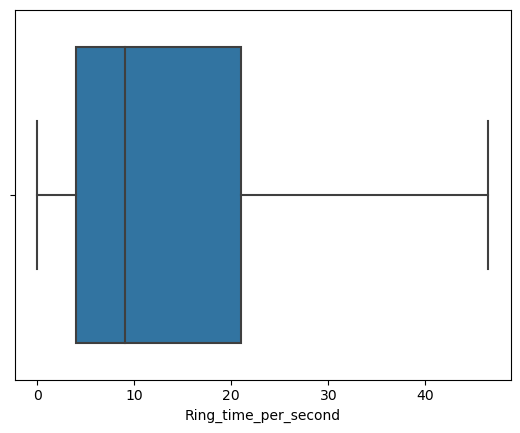

In [35]:
sns.boxplot(x = df["Ring_time_per_second"]);


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8734 entries, 2 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Day                    8734 non-null   object         
 1   Date                   8734 non-null   datetime64[ns] 
 2   Duration               8734 non-null   timedelta64[ns]
 3   Extension1_Name        8734 non-null   object         
 4   Extension1_Department  8734 non-null   object         
 5   Extension2_Name        8734 non-null   object         
 6   Extension2_Department  8734 non-null   object         
 7   Type                   8734 non-null   object         
 8   Status                 8734 non-null   object         
 9   Ring_time_per_second   8734 non-null   float64        
dtypes: datetime64[ns](1), float64(1), object(7), timedelta64[ns](1)
memory usage: 750.6+ KB


#### 4. Duplicate data handling

In [37]:
# Check for duplicate value
sum(df.duplicated())

0

In [38]:
df.shape

(8734, 10)

In [39]:
df.describe()

,Duration,Ring_time_per_second
count,8734,8734.000000
mean,0 days 00:00:51.641630409,14.576826
std,0 days 00:02:05.793676487,13.612019
min,0 days 00:00:00,0.000000
25%,0 days 00:00:00,4.000000
50%,0 days 00:00:10,9.000000
75%,0 days 00:00:54,21.000000
max,0 days 00:52:46,46.500000


#### 6.To make data readable

In [40]:
df['Name and Department ex1']= df['Extension1_Name']+': '+df['Extension1_Department']
df['Name and Department ex2']= df['Extension2_Name']+': '+df['Extension2_Department']
df

,Day,Date,Duration,Extension1_Name,Extension1_Department,Extension2_Name,Extension2_Department,Type,Status,Ring_time_per_second,Name and Department ex1,Name and Department ex2
2,Tue,2023-03-14 16:56:44,0 days 00:01:19,Mohammed,CyberSecurity Department,Mohammed,Information Technology,Income,Answer,5.0,Mohammed: CyberSecurity Department,Mohammed: Information Technology
3,Tue,2023-03-14 16:56:44,0 days 00:01:19,Mohammed,Information Technology,Mohammed,CyberSecurity Department,Outcome,Answer,5.0,Mohammed: Information Technology,Mohammed: CyberSecurity Department
4,Tue,2023-03-14 16:50:37,0 days 00:00:00,faiqah,Electro-Optics Systems Lab,syed,Strategic Planning / VRO,Income,Unnswer,20.0,faiqah: Electro-Optics Systems Lab,syed: Strategic Planning / VRO
5,Tue,2023-03-14 16:50:37,0 days 00:00:00,syed,Strategic Planning / VRO,faiqah,Electro-Optics Systems Lab,Outcome,Unnswer,20.0,syed: Strategic Planning / VRO,faiqah: Electro-Optics Systems Lab
6,Tue,2023-03-14 16:35:52,0 days 00:00:00,mohammed,"Legal Affairs, Partnerships & International Co...",mohammed,Business Development and Corporate Communication,Income,Unnswer,43.0,"mohammed: Legal Affairs, Partnerships & Intern...",mohammed: Business Development and Corporate C...
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Sun,2023-02-26 11:21:02,0 days 00:00:00,Fahad,Documents and Archiving Center,Ibrahim,FSS Management,Outcome,Unnswer,30.0,Fahad: Documents and Archiving Center,Ibrahim: FSS Management
9996,Sun,2023-02-26 11:20:51,0 days 00:00:31,Sulaytin,Information Technology,meshari,Information Technology,Income,Answer,4.0,Sulaytin: Information Technology,meshari: Information Technology
9997,Sun,2023-02-26 11:20:51,0 days 00:00:31,meshari,Information Technology,Sulaytin,Information Technology,Outcome,Answer,4.0,meshari: Information Technology,Sulaytin: Information Technology
9998,Sun,2023-02-26 11:17:47,0 days 00:01:10,abdulaziz,Facilities Management Department,Musaad,Financial Accounting,Income,Answer,16.0,abdulaziz: Facilities Management Department,Musaad: Financial Accounting


### 3. Data visualisation

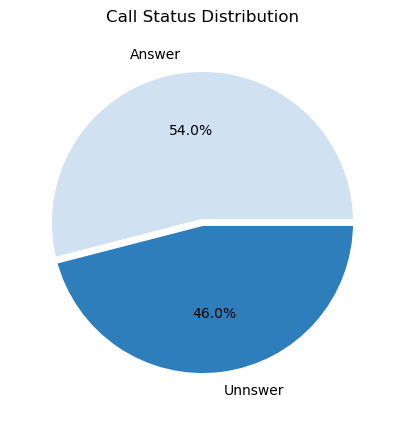

In [41]:
# Data visualisation for everyone in the company
plt.figure(figsize=(15, 5))

call_status_counts = df['Status'].value_counts()
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(call_status_counts)))
plt.pie(call_status_counts, labels=call_status_counts.index,  autopct='%1.1f%%',colors=colors, wedgeprops={"linewidth": 5, "edgecolor": "white"})

plt.title('Call Status Distribution');

- The majority of the calls in the dataset have been answered Which is 54 percent of the total calls
- The pie chart shows a relatively balanced distribution between answered and unanswered calls

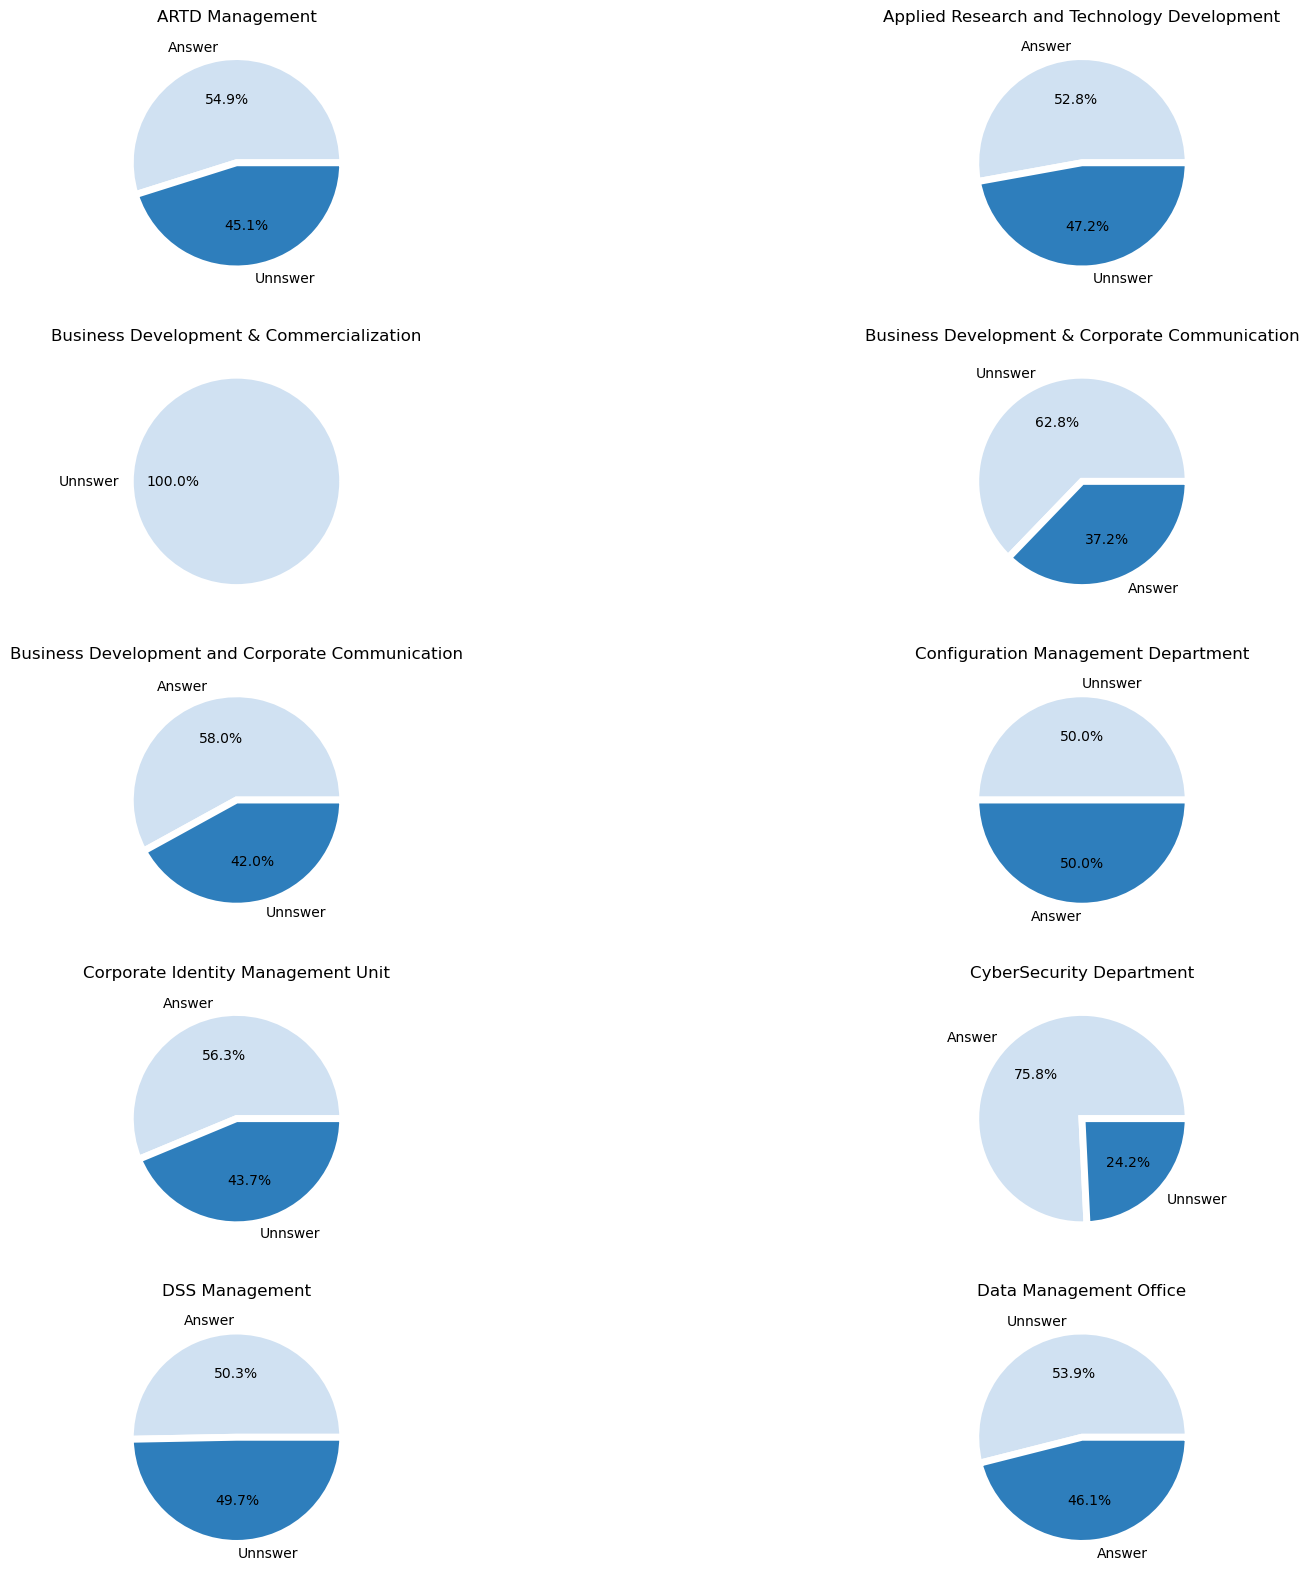

In [42]:
# show the first 10 department or we can just put the name of the department to view the details
Departments=df.groupby(by=['Extension1_Department'],as_index=False).sum()
Department_list=list(Departments['Extension1_Department'])
s=1
plt.figure(figsize=[20,20])
for i in Department_list:
    if s==11:
        break
    plt.subplot(5,2,s)
    Departments_data=df[df['Extension1_Department']==i]
    call_status_counts_for_Departments = Departments_data['Status'].value_counts()
    plt.pie(call_status_counts_for_Departments, labels=call_status_counts_for_Departments.index,  autopct='%1.1f%%',colors=colors, wedgeprops={"linewidth": 5, "edgecolor": "white"})
    plt.title(i);
    s+=1
    

- The pie chart shows a relatively balanced distribution between answered and unanswered calls

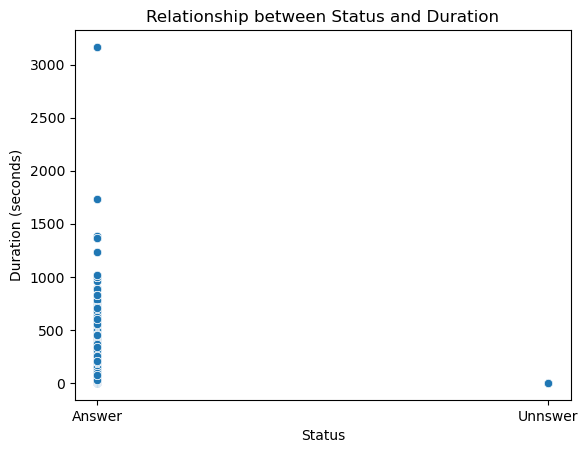

In [43]:
df['Duration'] = pd.to_timedelta(df['Duration'])


status = df['Status']
durations = df['Duration'].apply(lambda x: x.total_seconds())
sns.scatterplot(x=status, y=durations)
plt.xlabel('Status')
plt.ylabel('Duration (seconds)')
plt.title('Relationship between Status and Duration');

- Answered Calls Duration ranges from 0 to 1,700 seconds
- We can observe that the majority of call durations are relatively short, with a few longer duration calls

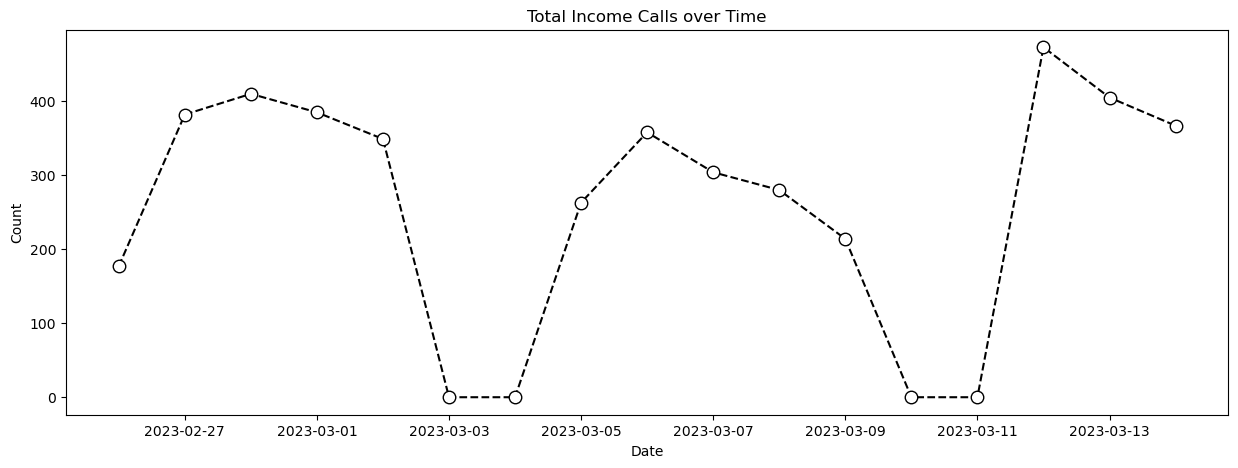

In [44]:
plt.figure(figsize=(15, 5))
df['Date'] = pd.to_datetime(df['Date'])
income_calls_over_time = df[df['Type'] == 'Income'].groupby(pd.Grouper(key='Date', freq='D')).size()


plt.plot(income_calls_over_time.index, income_calls_over_time.values, marker='o', markerfacecolor='white', markeredgecolor='black', markersize=9,color='black',linestyle='--')

plt.title('Total Income Calls over Time')
plt.xlabel('Date')
plt.ylabel('Count');

- The line plot shows the trend of total income calls over time.
- you can identify the points where the total income call volume reaches its highest peaks these peak periods can  provide valuable information about the factors that contribute to increased call volume, such as marketing campaigns, promotions, or seasonal demand.
- Similarly, you can identify periods where the total income call volume is relatively low

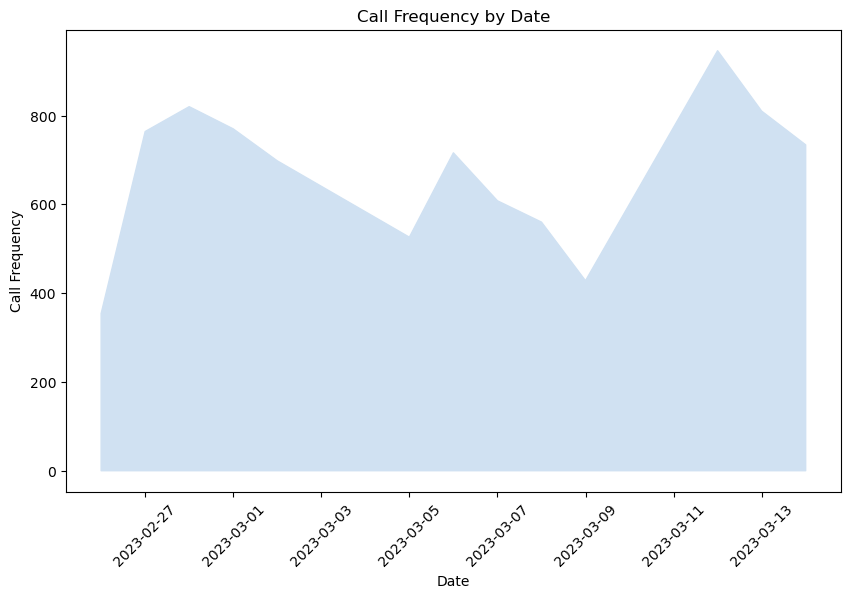

In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date


call_frequency_by_date = df['Date'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.fill_between(call_frequency_by_date.index, call_frequency_by_date.values, color=colors)
plt.xlabel('Date')
plt.ylabel('Call Frequency')
plt.title('Call Frequency by Date')
plt.xticks(rotation=45);

- The chart highlights periods when call frequency is particularly high or low. These periods may correspond to specific events, marketing campaigns, or external factors that influence call volume.

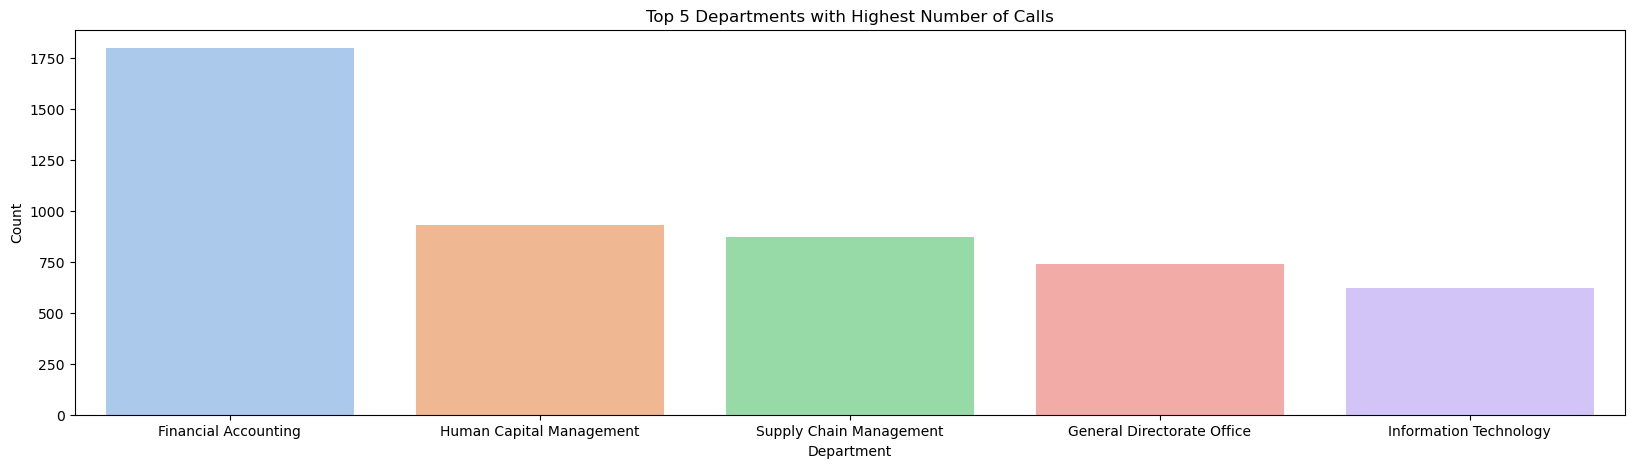

In [46]:
plt.figure(figsize=(20, 5))

top5_departments = df['Extension1_Department'].value_counts().nlargest(5)
sns.barplot(x=top5_departments.index, y=top5_departments.values,palette='pastel')

plt.title('Top 5 Departments with Highest Number of Calls')
plt.xlabel('Department')
plt.ylabel('Count');

- financial accounting receive the highest call volumes 
- The bar chart highlights the top 5 departments with the highest call volumes These departments are likely to have a significant impact on customer service, as they handle a substantial number of calls.

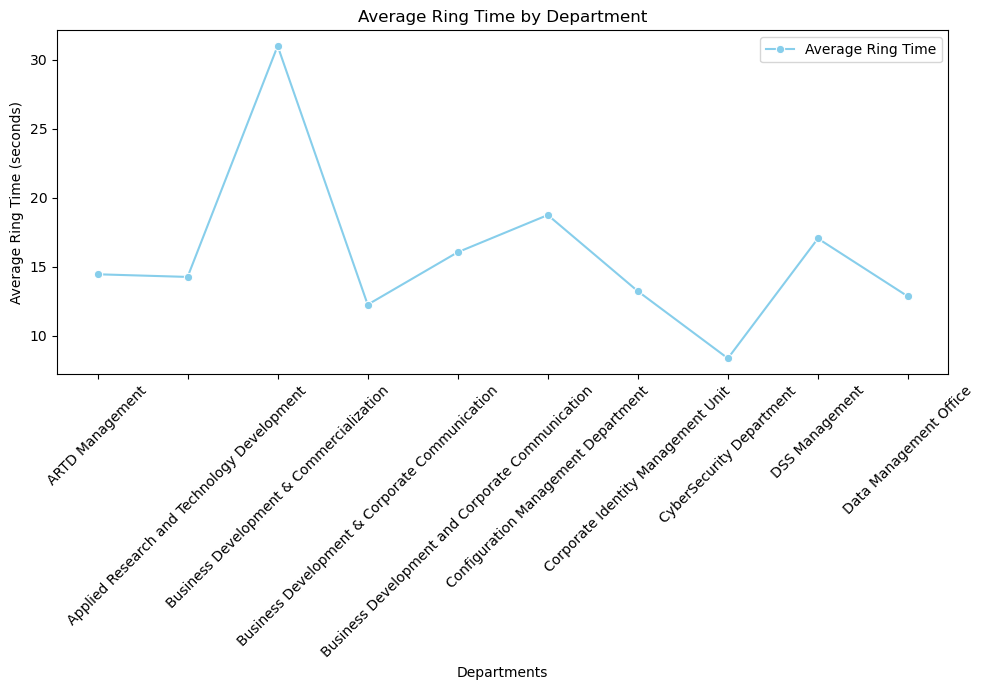

In [47]:
#for 10 Departments
plt.figure(figsize=(10, 7))
grouped_data = df.groupby('Extension1_Department')['Ring_time_per_second'].mean()
sns.lineplot(x=grouped_data[0:10].index, y=grouped_data[0:10].values, marker='o', color='skyblue', label='Average Ring Time')

plt.xlabel('Departments')
plt.ylabel('Average Ring Time (seconds)')
plt.title('Average Ring Time by Department')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

- Departments with higher mean numeric values indicating superior performance.
- departments with lower mean numeric values suggesting areas for improvement.

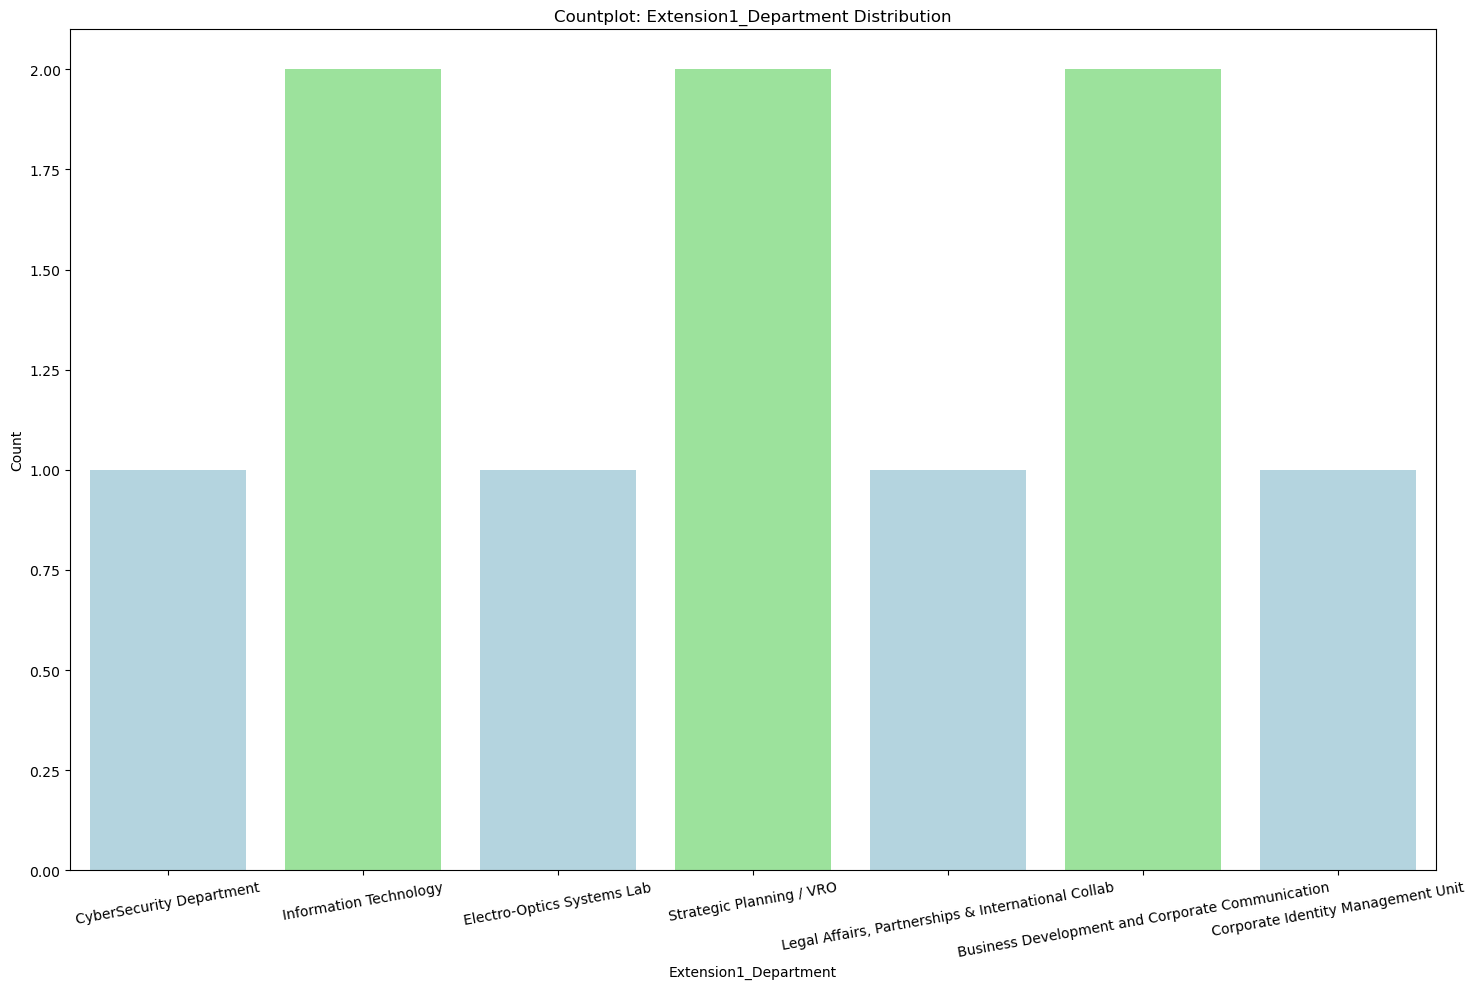

In [48]:
plt.figure(figsize=(15, 10))

sns.countplot(data=df[0:10], x='Extension1_Department',palette=['lightblue', 'lightgreen'])


plt.xlabel('Extension1_Department')
plt.ylabel('Count')
plt.title('Countplot: Extension1_Department Distribution')
plt.xticks(rotation=10);
plt.tight_layout()

- we can observe which departments have higher or lower counts of calls compared to others.

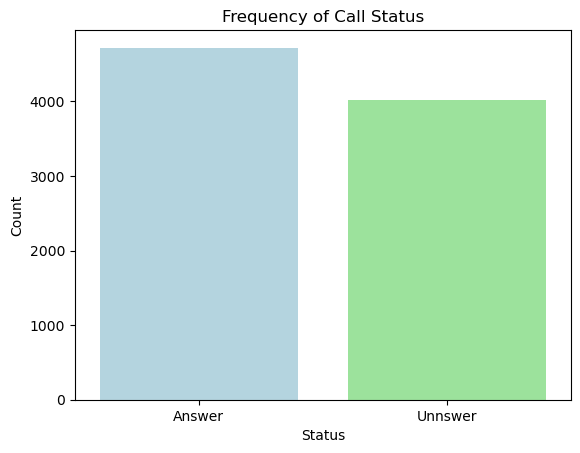

In [49]:
status = df['Status']

sns.countplot(x=status,palette=['lightblue', 'lightgreen'])

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Frequency of Call Status');

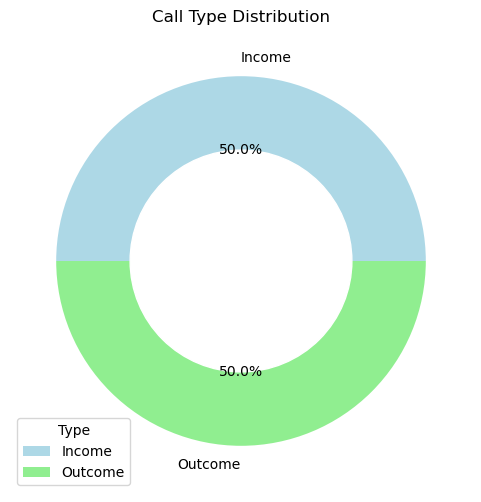

In [50]:
call_type_distribution = df['Type'].value_counts()

# Create the donut chart
plt.figure(figsize=(6, 6))
plt.pie(call_type_distribution.values, labels=call_type_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Call Type Distribution')
plt.legend(title='Type', loc='lower left')
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'));

- The donut chart shows that the proportion of calls are equal

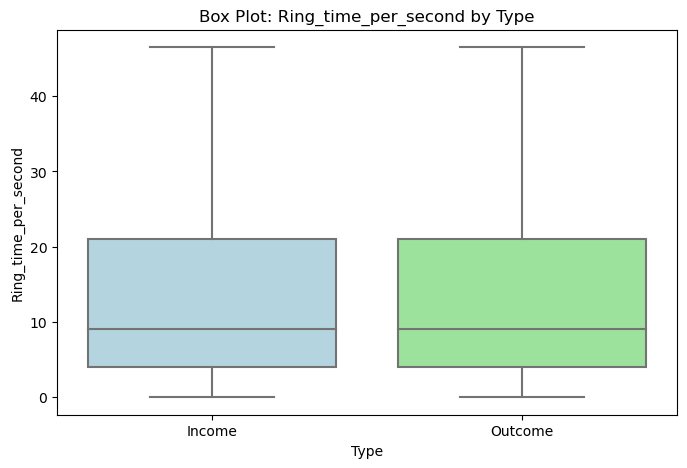

In [51]:
plt.figure(figsize=(8, 5))

c = 'Type'
n = 'Ring_time_per_second'

sns.boxplot(x=c, y=n, data=df,palette=['lightblue', 'lightgreen'])

plt.xlabel(c)
plt.ylabel(n)
plt.title('Box Plot: {} by {}'.format(n, c));

- Call types with higher median values indicate a longer "Ring_time_per_second" on average.

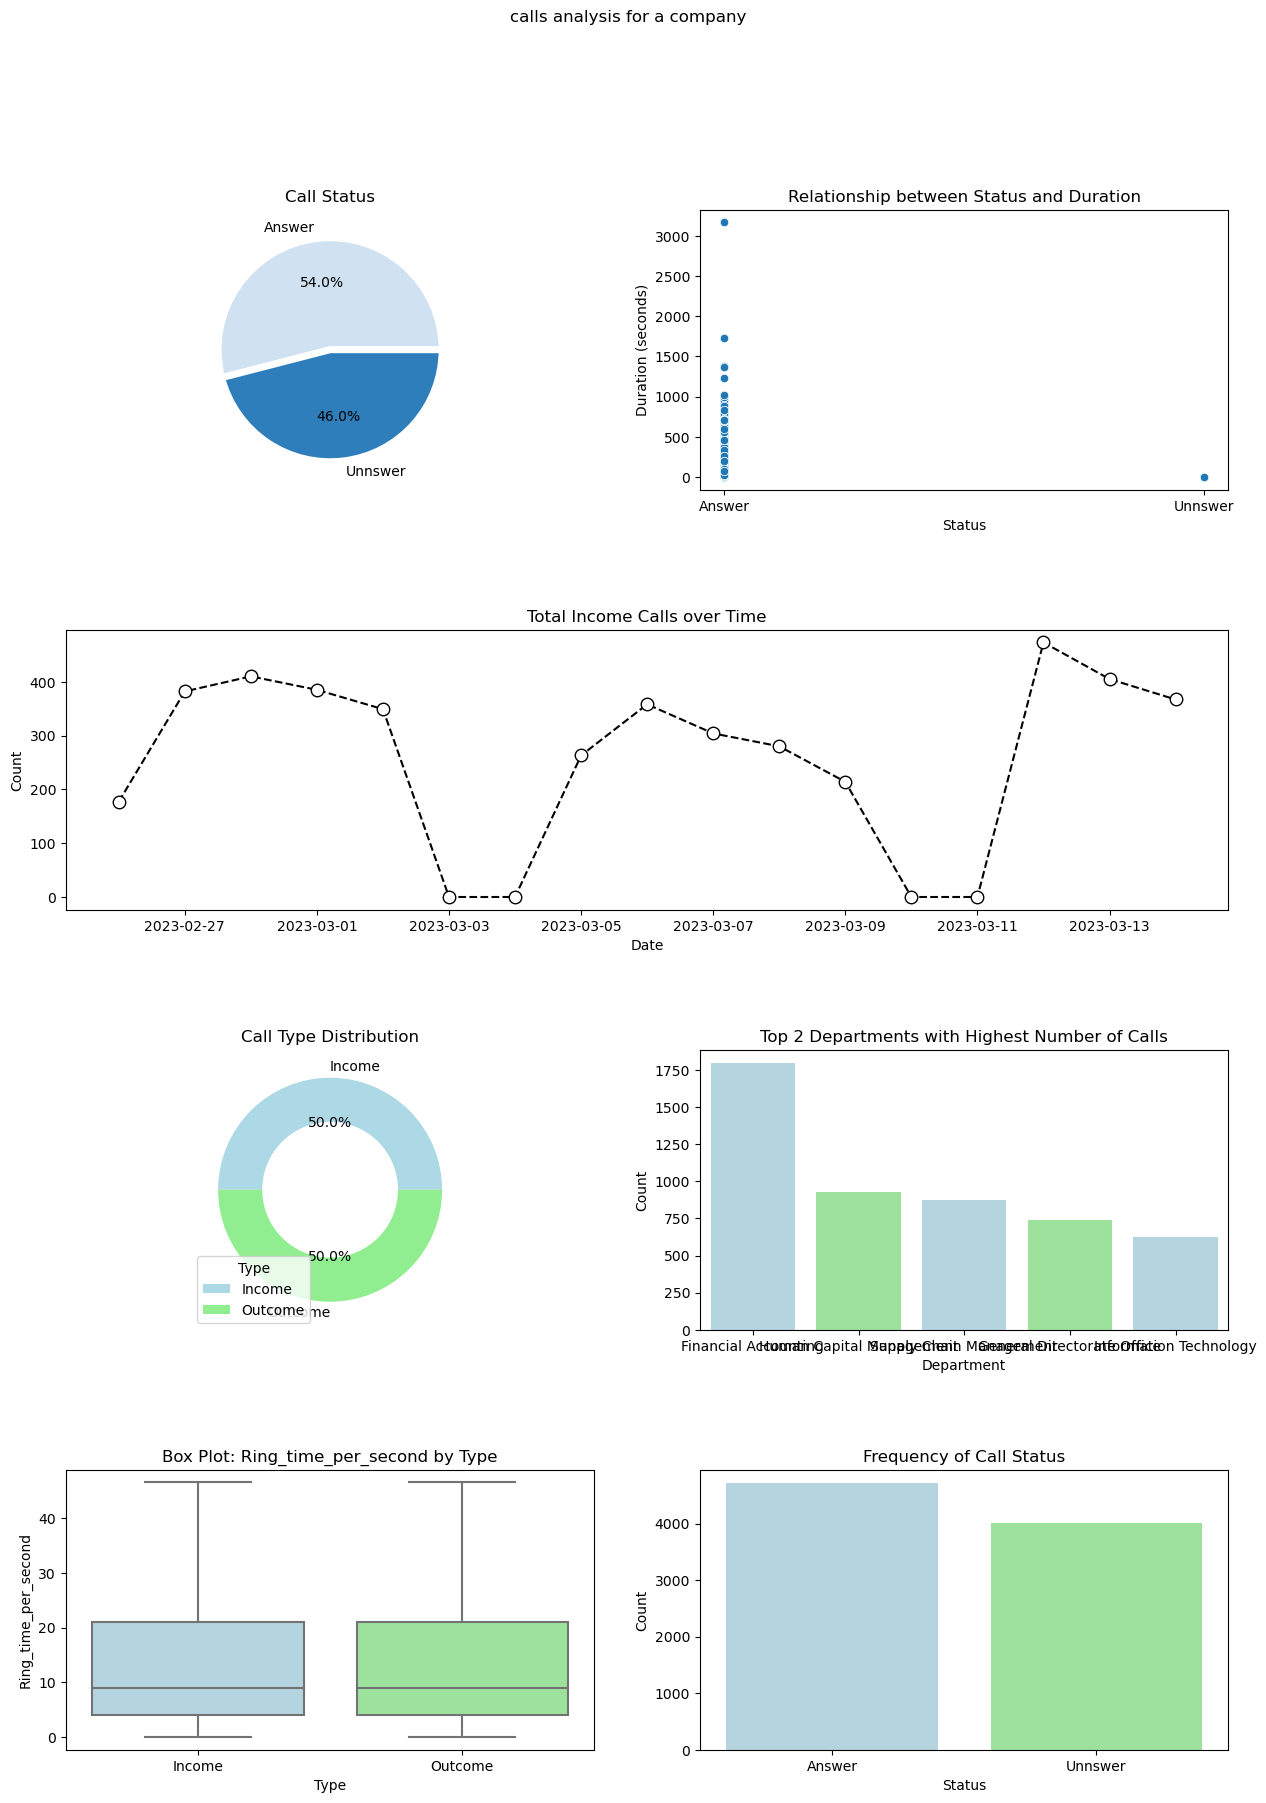

In [52]:

plt.figure(figsize=(15, 20))
plt.suptitle('calls analysis for a company')

plt.subplot(421)
plt.pie(call_status_counts, labels=call_status_counts.index,  autopct='%1.1f%%',colors=colors, wedgeprops={"linewidth": 5, "edgecolor": "white"})
plt.title('Call Status');


plt.subplot(422)
sns.scatterplot(x=status, y=durations)
plt.xlabel('Status')
plt.ylabel('Duration (seconds)')
plt.title('Relationship between Status and Duration');




plt.subplot(412)
plt.plot(income_calls_over_time.index, income_calls_over_time.values, marker='o', markerfacecolor='white', markeredgecolor='black', markersize=9,color='black',linestyle='--')
plt.title('Total Income Calls over Time')
plt.xlabel('Date')
plt.ylabel('Count');



plt.subplot(425)
plt.pie(call_type_distribution.values, labels=call_type_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Call Type Distribution')
plt.legend(title='Type', loc='lower left')
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'));


plt.subplot(426)
sns.barplot(x=top5_departments.index, y=top5_departments.values,palette=['lightblue', 'lightgreen'])
plt.title('Top 2 Departments with Highest Number of Calls')
plt.xlabel('Department')
plt.ylabel('Count');



plt.subplot(427)
c = 'Type'
n = 'Ring_time_per_second'
sns.boxplot(x=c, y=n, data=df,palette=['lightblue', 'lightgreen'])
plt.xlabel('Type')
plt.ylabel(n)
plt.title('Box Plot: {} by {}'.format(n, c));


plt.subplot(428)
sns.countplot(x=status,palette=['lightblue', 'lightgreen'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Frequency of Call Status');


plt.subplots_adjust(hspace=0.5)  



### 4. Pandas profiling

In [53]:
profile = ProfileReport(df , title = "Pandas Report", html={"style":{"full_width": True}})

In [54]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]